### Reading Files into Python

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_excel("DS_Assignment_Part1_data_set.xlsx")

In [3]:
#first 5 instances using "head()" function
Data.head()

,Transaction_date,House_Age,Distance_from_nearest_Metro_station_km,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size_sqft,House_price_of_unit_area
0,1905-07-04 22:00:00.003,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,1905-07-04 22:00:00.003,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,1905-07-05 13:59:59.997,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,1905-07-05 12:00:00.000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,1905-07-04 19:59:59.997,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
#last 5 instances using "tail()" function
Data.tail()

,Transaction_date,House_Age,Distance_from_nearest_Metro_station_km,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size_sqft,House_price_of_unit_area
409,1905-07-05 00:00:00.000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,1905-07-04 16:00:00.003,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,1905-07-05 06:00:00.000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,1905-07-05 00:00:00.000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5
413,1905-07-05 12:00:00.000,6.5,90.45606,9,24.97433,121.54310,2,1097,63.9


In [5]:
Data.shape

(414, 9)

In [6]:
#Printing all the columns present in data
Data.columns

Index(['Transaction_date', 'House_Age',
       'Distance_from_nearest_Metro_station_km',
       'Number_of_convenience_stores', 'latitude', 'longitude',
       'Number_of_bedrooms', 'House_size_sqft', 'House_price_of_unit_area'],
      dtype='object')

In [7]:
# A closer look at the data types present in the data
Data.dtypes

Transaction_date                          datetime64[ns]
House_Age                                        float64
Distance_from_nearest_Metro_station_km           float64
Number_of_convenience_stores                       int64
latitude                                         float64
longitude                                        float64
Number_of_bedrooms                                 int64
House_size_sqft                                    int64
House_price_of_unit_area                         float64
dtype: object

#### Integer Data Type

In [8]:
# Identifying variables with integer datatype
Data.dtypes[Data.dtypes == 'int64']

Number_of_convenience_stores    int64
Number_of_bedrooms              int64
House_size_sqft                 int64
dtype: object

Summary:

*House size and number of convenience stores are unique numbers. It is are Okay as Integer.

*Number of bedrooms represents different types of houses, therefore it should be converted to category.


In [9]:
Data['Number_of_bedrooms'] = Data['Number_of_bedrooms'].astype('category')

#### Float Data Type

In [10]:
Data.dtypes[Data.dtypes == 'float64']

House_Age                                 float64
Distance_from_nearest_Metro_station_km    float64
latitude                                  float64
longitude                                 float64
House_price_of_unit_area                  float64
dtype: object

Summary:

* There is no much difference in the data of latitudes and longitudes. so we consider them as houses from the same area.
  If they are from different areas we can use the location as category but since it is not the case let it be float64.

* Distance from nearest Metro station and House_price can be float64.

* we can convert house age into 3 categorical variables under construction, new and old. 

In [11]:
# House age --> 0 ---> under construction
# House age --> (0-10] --> New
# House age --> (10-50] --> Old

Data['Property_age_cat'] = pd.cut(x=Data['House_Age'], bins=[-1,0,10,25,50],
                     labels=['Under_construction', 'New', 'Old','very_Old'])  

In [12]:
# Just check the whether the transformation from number to category type is done correctly

In [13]:
Data[['House_Age','Property_age_cat']].sort_values(by = ['House_Age'])

,House_Age,Property_age_cat
166,0.0,Under_construction
103,0.0,Under_construction
373,0.0,Under_construction
105,0.0,Under_construction
123,0.0,Under_construction
...,...,...
128,41.3,very_Old
173,41.3,very_Old
361,41.4,very_Old
392,42.7,very_Old


In [14]:
Data[['House_Age','Property_age_cat']] [Data['House_Age'] == 0]

,House_Age,Property_age_cat
16,0.0,Under_construction
85,0.0,Under_construction
90,0.0,Under_construction
103,0.0,Under_construction
105,0.0,Under_construction
123,0.0,Under_construction
146,0.0,Under_construction
164,0.0,Under_construction
166,0.0,Under_construction
211,0.0,Under_construction


#### Datetime Data Type

**Breaking down the date variable** into granular information will **help us in understand when the last transaction was done from different perspectives**. But since the data has only two dates 04-07-1905 and 05-07-1905 just day of the year will suffice

In [15]:
# creating an instance(date) of DatetimeIndex class using "last_transaction"
date = pd.DatetimeIndex(Data['Transaction_date'])

In [16]:
# extracting new columns from "Transaction_date"

# last day of year when transaction was done
Data['doy_ls_tran'] = date.dayofyear


In [17]:
# checking new extracted columns using datetime
Data[['Transaction_date','doy_ls_tran']].head()

,Transaction_date,doy_ls_tran
0,1905-07-04 22:00:00.003,185
1,1905-07-04 22:00:00.003,185
2,1905-07-05 13:59:59.997,186
3,1905-07-05 12:00:00.000,186
4,1905-07-04 19:59:59.997,185


Now that we have extracted the essentials from the last_transaction variables, we will drop it from the dataset.

In [18]:
Data = Data.drop(columns = ['Transaction_date'])
Data.dtypes

House_Age                                  float64
Distance_from_nearest_Metro_station_km     float64
Number_of_convenience_stores                 int64
latitude                                   float64
longitude                                  float64
Number_of_bedrooms                        category
House_size_sqft                              int64
House_price_of_unit_area                   float64
Property_age_cat                          category
doy_ls_tran                                  int64
dtype: object

### Missing Values

In [19]:
# finding number of missing values in every variable
Data.isnull().sum()

House_Age                                 0
Distance_from_nearest_Metro_station_km    0
Number_of_convenience_stores              0
latitude                                  0
longitude                                 0
Number_of_bedrooms                        0
House_size_sqft                           0
House_price_of_unit_area                  0
Property_age_cat                          0
doy_ls_tran                               0
dtype: int64

# Exploratory Data Analysis

#### Univariate Analysis: Numerical Variables

In [20]:
# seggregating variables into groups
Location_related_var = ['latitude','longitude','Number_of_convenience_stores','Distance_from_nearest_Metro_station_km']
House_char = ['House_size_sqft','House_Age']
Transaction_date = ['doy_ls_tran']

In [21]:
# custom function for easy and efficient analysis of numerical univariate
# import pdb
def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    mode = data[i].mode()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
#     pdb.set_trace()
    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data =data[i], shade=True)
    sns.lineplot(x=points,y= [0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x=[mini,maxi],y= [0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean],y= [0], color = 'red', label = "mean")
    sns.scatterplot(x=[median],y= [0], color = 'blue', label = "median")
#     sns.scatterplot(x=[mode[0]],y= [0], color = 'green', label = "mode")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

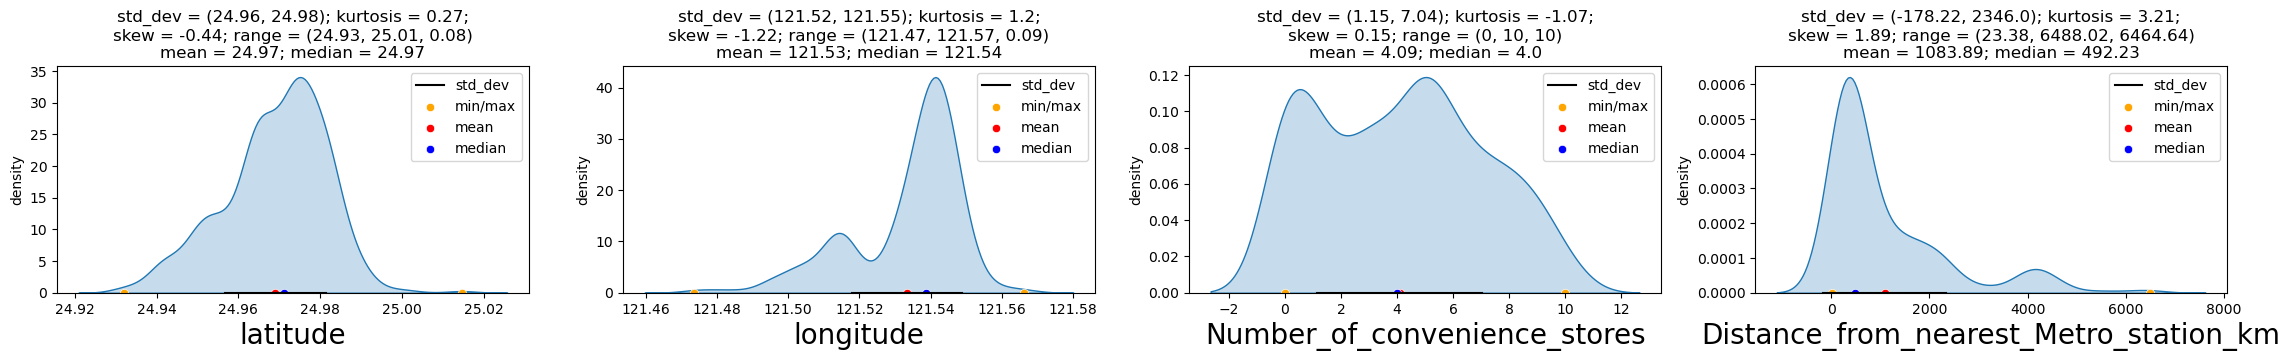

In [22]:
UVA_numeric(Data, Location_related_var)

Summary of Location related information:

Latitude:

* Most of the latitude values fall between 24.96 to 24.98
* skewness -0.44 : this is fairly symmetric(-0.5 to 0.5), latitude variable is negligibly biased towards higher latitude.
* Kurtosis = 0.27: Outlier frequency is low since kurtosis is less than 3 but they are present as you can see from the graph

Longitude:

* Most of the longitude values fall between 121.52 to 121.55
* This looks like a bimodal distribution with the main peak at 121.54 and a lower peak around 121.51
* skewness -1.22 : this is highly left skewed distribution, longitude variable is significantly biased towards higher   longitude.
* Kurtosis = 1.2: Outlier frequency is low since kurtosis is less than 3 but they are present as you can see from the graph.


Number of convenience stores:

* This looks like a bimodal distribution with the main peak at 5 and a lower peak around 1
* skewness = 0.15 : this is fairly symmetric(-0.5 to 0.5).
* Kurtosis = -1.07: Outlier frequency is low since kurtosis is less than 3.

Distance from nearest metro station:

* Metro stations are mainly between 23 to 1500 kms.
* skewness 1.89 : this is highly right skewed, this variable is significantly biased towards low distances.
* Kurtosis = 3.21: Extreme values and Outliers are very likely to be present in this variable.



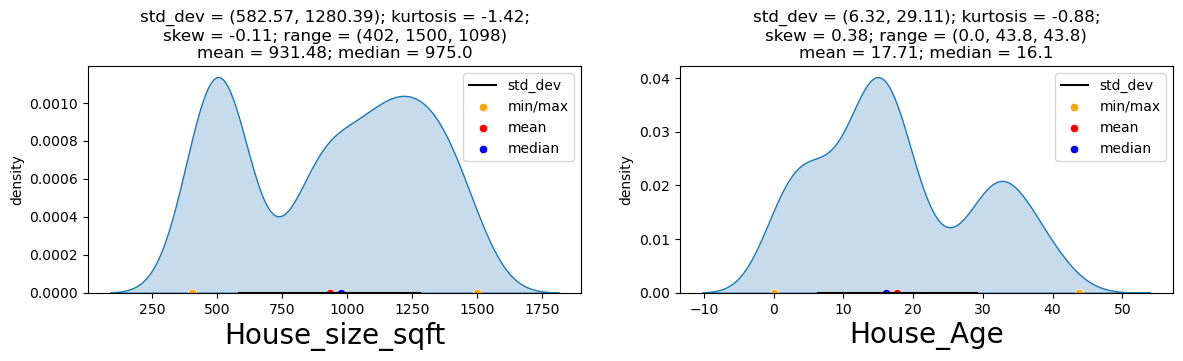

In [23]:
UVA_numeric(Data, House_char)

House size:

* This looks like a bimodal distribution with the main peak at around 490 and a lower peak around 1250
* Skewness -0.11 : this is fairly symmetric(-0.5 to 0.5)
* Kurtosis = -1.42: Outlier frequency is low since kurtosis is less than 3. It is better to convert this variable to category

House Age:

* This looks like a bimodal distribution with the main peak at 18 and a lower peak around 35 
* skewness = 0.38 : this is fairly symmetric(-0.5 to 0.5). 
* Kurtosis = -0.88: Outlier frequency is low since kurtosis is less than 3.

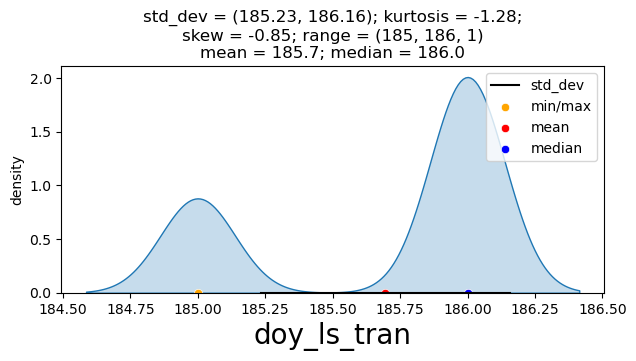

In [24]:
UVA_numeric(Data, Transaction_date)

Since all the transactions happened in two days only this graph is bimodal one peak for each date

In [25]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(x=norm_count,y= norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

In [26]:
# convert house size into 2 categories small and big based on the bimodal graph we got in the univariate numerical analysis
#  small --> below 750sft
#  big --> above 750sft
Data['Property_size_cat'] = pd.cut(x=Data['House_size_sqft'],bins=[0,750,2000], labels = ['small','big'])


In [27]:
Data

,House_Age,Distance_from_nearest_Metro_station_km,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size_sqft,House_price_of_unit_area,Property_age_cat,doy_ls_tran,Property_size_cat
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,very_Old,185,small
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,Old,185,big
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,Old,186,big
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,Old,186,big
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,New,185,small
...,...,...,...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4,Old,186,big
410,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0,New,185,big
411,18.8,390.96960,7,24.97923,121.53986,1,503,40.6,Old,186,small
412,8.1,104.81010,5,24.96674,121.54067,1,597,52.5,New,186,small


In [28]:
Property_type = ['Property_age_cat','Number_of_bedrooms','Property_size_cat']

In [29]:
Property_type

['Property_age_cat', 'Number_of_bedrooms', 'Property_size_cat']

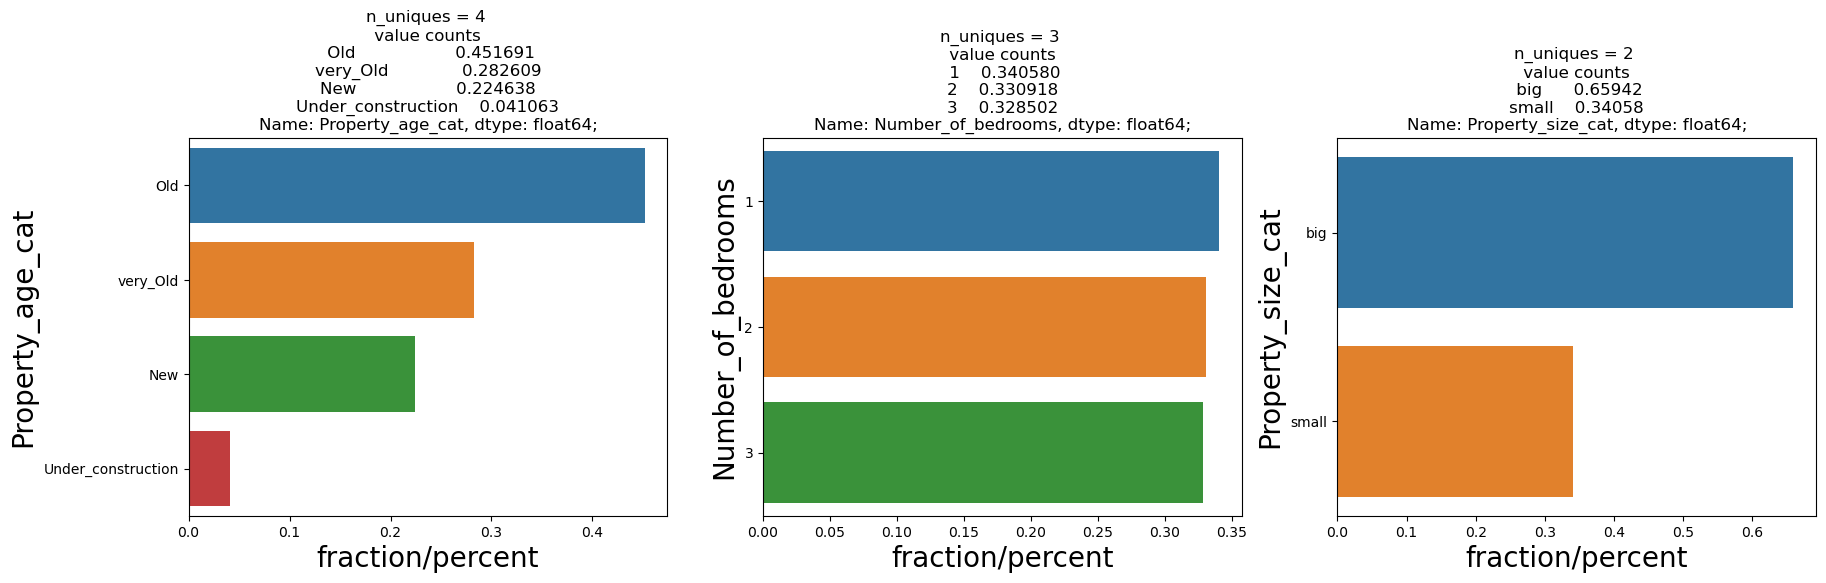

In [30]:
UVA_category(Data, Property_type)

**Summary**

*Property age:*

* Majority of properties are old.There are a few under construction. 

*Number of bedrooms:*

* This seems like a there are almost similar no of houses with 1,2,3 bedrooms.

*Property size category:*

* Big houses are twice in number that the small ones.

**Lets just understand the target variable:**

In [31]:
target = ['House_price_of_unit_area']

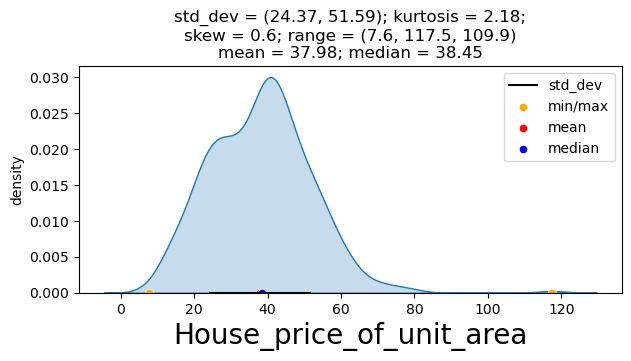

In [32]:
UVA_numeric(Data,target)

* skewness = 0.6 : this graph is right skewed, House price is biased towards low prices.

* Kurtosis = 2.18: Outlier frequency is low since kurtosis is less than 3 but we have some we will work on them later on.

C:\Users\vempa\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


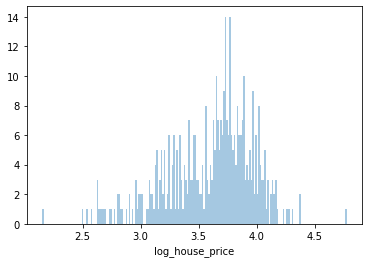

In [33]:
Data['log_house_price'] = np.log(Data['House_price_of_unit_area'].values + 1)
sns.distplot(Data['log_house_price'], kde = False, bins = 200)
plt.show()

* there are outliers at the upper close to 5 and lower end close to 0.5 of the house price
* when we look at the excel data it looks like one of the house has price below 10 per unit area with good qualities like(house area, 2 bed room,less distance fom metro,more stores near by, house age is 14years)
* there is one more outlier house cost above 100 per unit area. 

## ***Missing Values***

In [34]:
# finding number of missing values in every variable
Data.isnull().sum()

House_Age                                 0
Distance_from_nearest_Metro_station_km    0
Number_of_convenience_stores              0
latitude                                  0
longitude                                 0
Number_of_bedrooms                        0
House_size_sqft                           0
House_price_of_unit_area                  0
Property_age_cat                          0
doy_ls_tran                               0
Property_size_cat                         0
log_house_price                           0
dtype: int64

No missing values in the data

## Univariate Analysis: Outliers

In [35]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

In [36]:
Location_related_var = ['latitude','longitude','Number_of_convenience_stores','Distance_from_nearest_Metro_station_km']
House_char = ['House_size_sqft','House_Age']
Transaction_date = ['doy_ls_tran']

**since we suspected ouliers in the Location related variables lets confirm it by box plot**

C:\Users\vempa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vempa\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\vempa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vempa\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

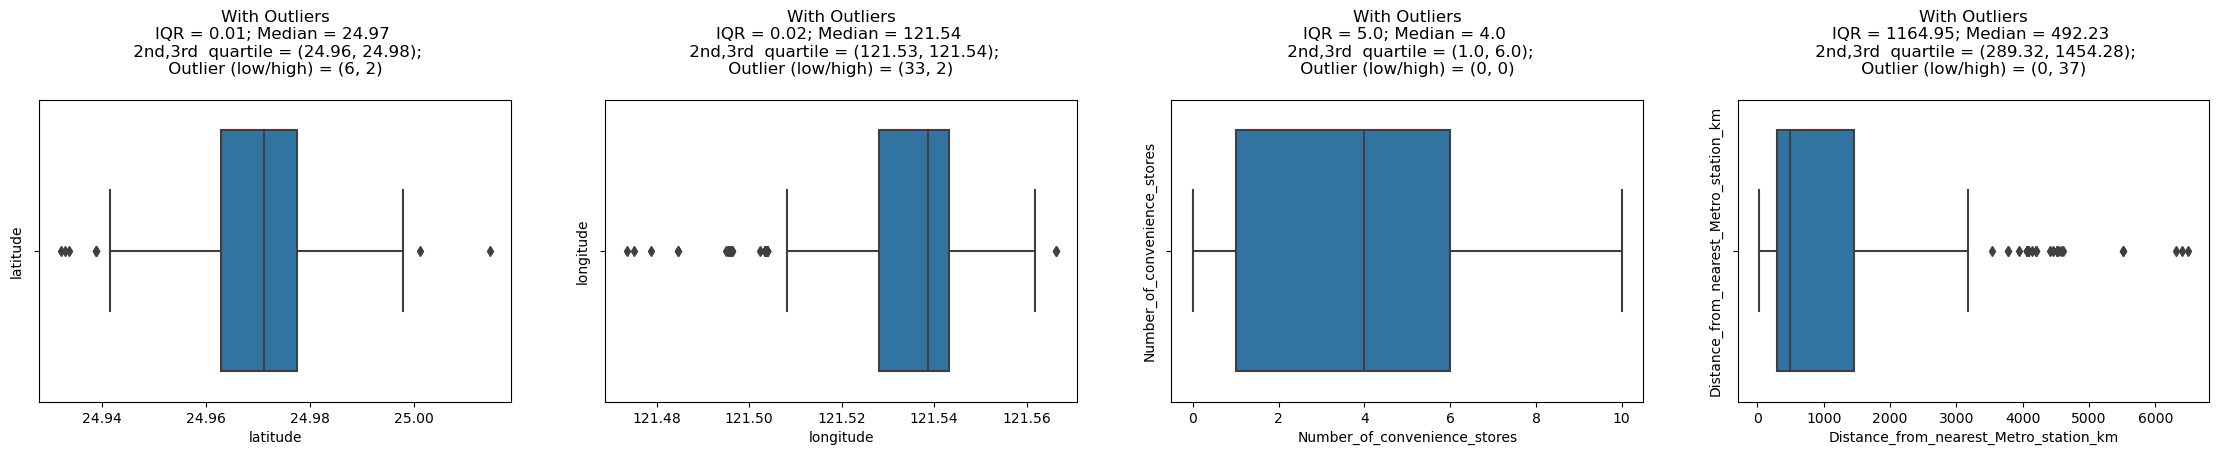

In [37]:
UVA_outlier(Data, Location_related_var)

C:\Users\vempa\AppData\Local\Temp/ipykernel_20036/3852463894.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2[i][data2[i]<whis_low] = whis_low-1
C:\Users\vempa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vempa\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\vempa\AppData\Local\Temp/ipykernel_20036/3852463894.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

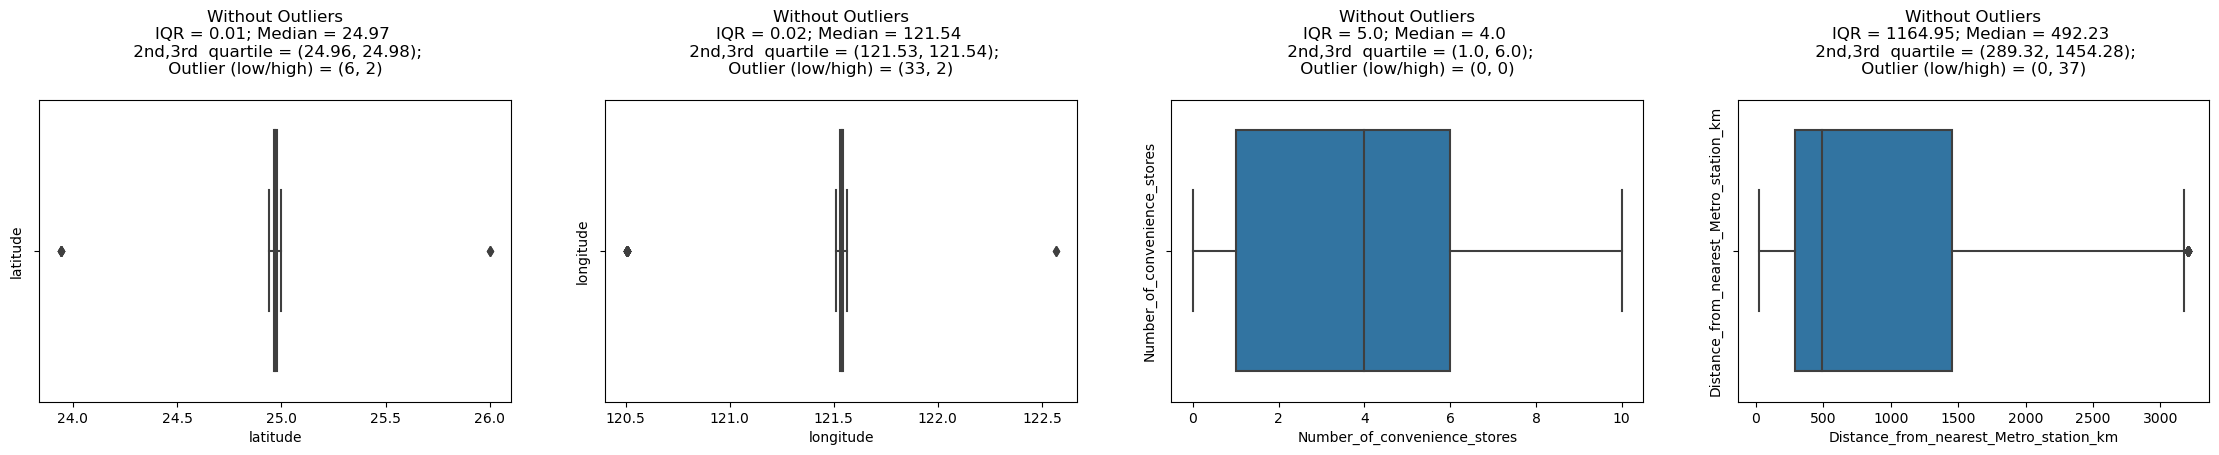

In [38]:
UVA_outlier(Data, Location_related_var, include_outlier = False)

* so there are outliers in latitude, longitude and distance from nearest metro station variables.

**we didnt suspect outliers in the house_char group- lets confirm it too**

C:\Users\vempa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vempa\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\vempa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vempa\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

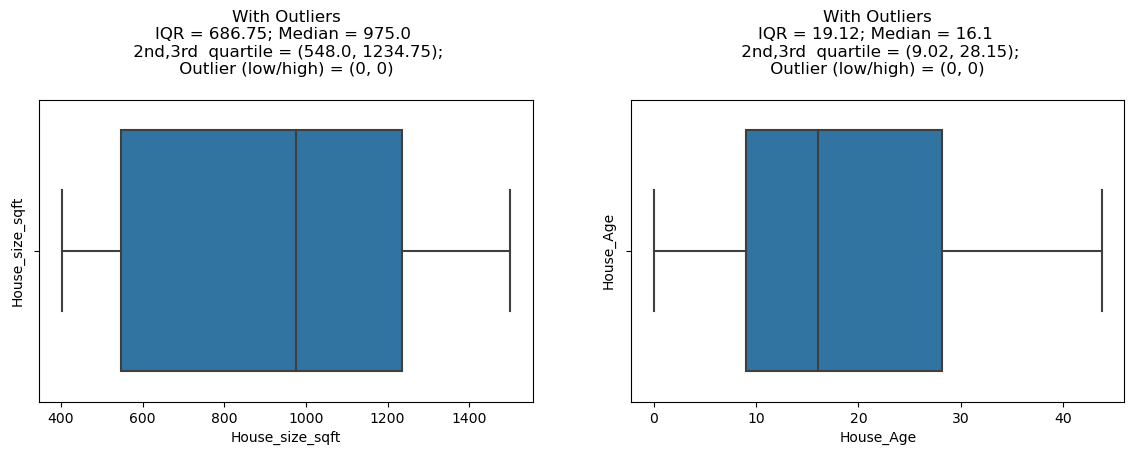

In [39]:
UVA_outlier(Data, House_char, include_outlier = True)

## Bivariate Analysis : Numerical-Numerical

In [40]:
# isolating numerical datatypes
numerical = Data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

House_Age                                 float64
Distance_from_nearest_Metro_station_km    float64
Number_of_convenience_stores                int64
latitude                                  float64
longitude                                 float64
House_size_sqft                             int64
House_price_of_unit_area                  float64
doy_ls_tran                                 int64
log_house_price                           float64
dtype: object

In [41]:
numerical

,House_Age,Distance_from_nearest_Metro_station_km,Number_of_convenience_stores,latitude,longitude,House_size_sqft,House_price_of_unit_area,doy_ls_tran,log_house_price
0,32.0,84.87882,10,24.98298,121.54024,575,37.9,185,3.660994
1,19.5,306.59470,9,24.98034,121.53951,1240,42.2,185,3.765840
2,13.3,561.98450,5,24.98746,121.54391,1060,47.3,186,3.877432
3,13.3,561.98450,5,24.98746,121.54391,875,54.8,186,4.021774
4,5.0,390.56840,5,24.97937,121.54245,491,43.1,185,3.786460
...,...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,803,15.4,186,2.797281
410,5.6,90.45606,9,24.97433,121.54310,1278,50.0,185,3.931826
411,18.8,390.96960,7,24.97923,121.53986,503,40.6,186,3.728100
412,8.1,104.81010,5,24.96674,121.54067,597,52.5,186,3.979682


In [42]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,House_Age,Distance_from_nearest_Metro_station_km,Number_of_convenience_stores,latitude,longitude,House_size_sqft,House_price_of_unit_area,doy_ls_tran,log_house_price
House_Age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.060361,-0.210567,0.049171,-0.190265
Distance_from_nearest_Metro_station_km,0.025622,1.000000,-0.602519,-0.591067,-0.806317,0.001795,-0.673613,0.016519,-0.751382
Number_of_convenience_stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.033286,0.571005,-0.005586,0.599676
latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.031696,0.546307,0.008118,0.616971
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.009322,0.523287,0.013177,0.593325
House_size_sqft,-0.060361,0.001795,0.033286,0.031696,0.009322,1.000000,0.046489,0.025156,0.028273
House_price_of_unit_area,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.046489,1.000000,0.081545,0.964434
doy_ls_tran,0.049171,0.016519,-0.005586,0.008118,0.013177,0.025156,0.081545,1.000000,0.073652
log_house_price,-0.190265,-0.751382,0.599676,0.616971,0.593325,0.028273,0.964434,0.073652,1.000000


### Heatmap

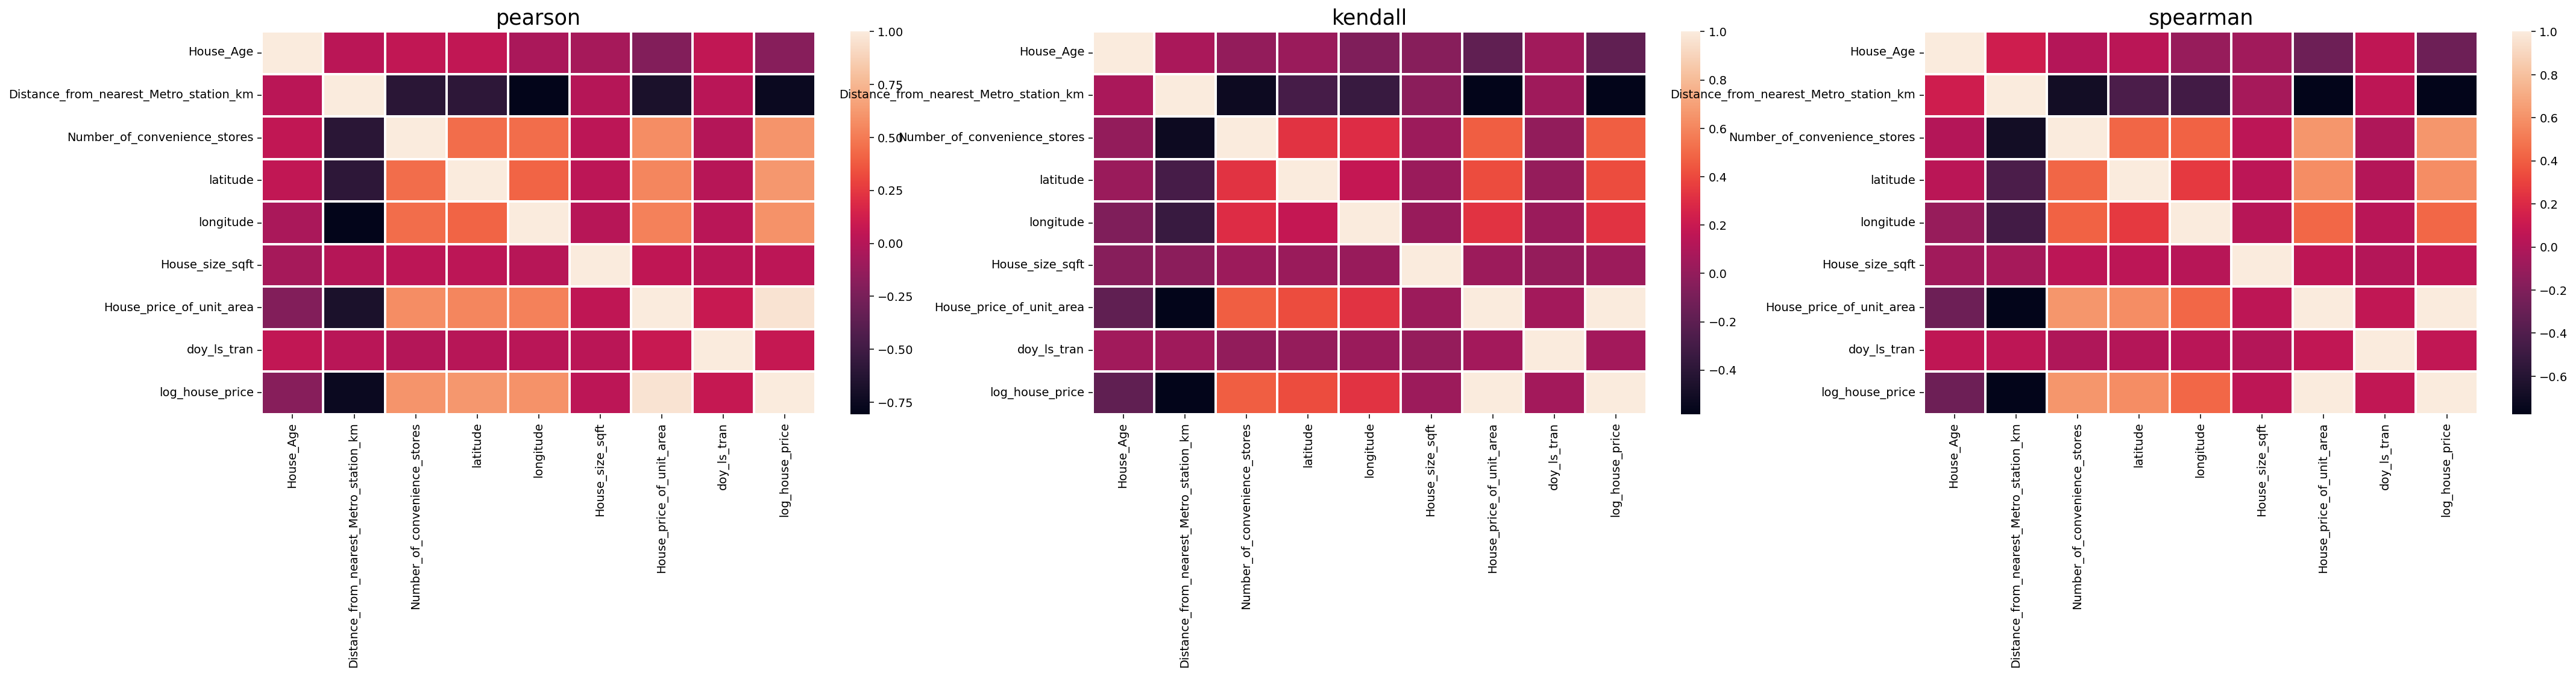

In [43]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)



* Pearson, Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
* Many variables have correlation.
* Major correlation lies among the location variables 

Lets check the location variables seperately

In [44]:
# calculating correlation
correlation = Data[Location_related_var].dropna().corr()
correlation

,latitude,longitude,Number_of_convenience_stores,Distance_from_nearest_Metro_station_km
latitude,1.000000,0.412924,0.444143,-0.591067
longitude,0.412924,1.000000,0.449099,-0.806317
Number_of_convenience_stores,0.444143,0.449099,1.000000,-0.602519
Distance_from_nearest_Metro_station_km,-0.591067,-0.806317,-0.602519,1.000000


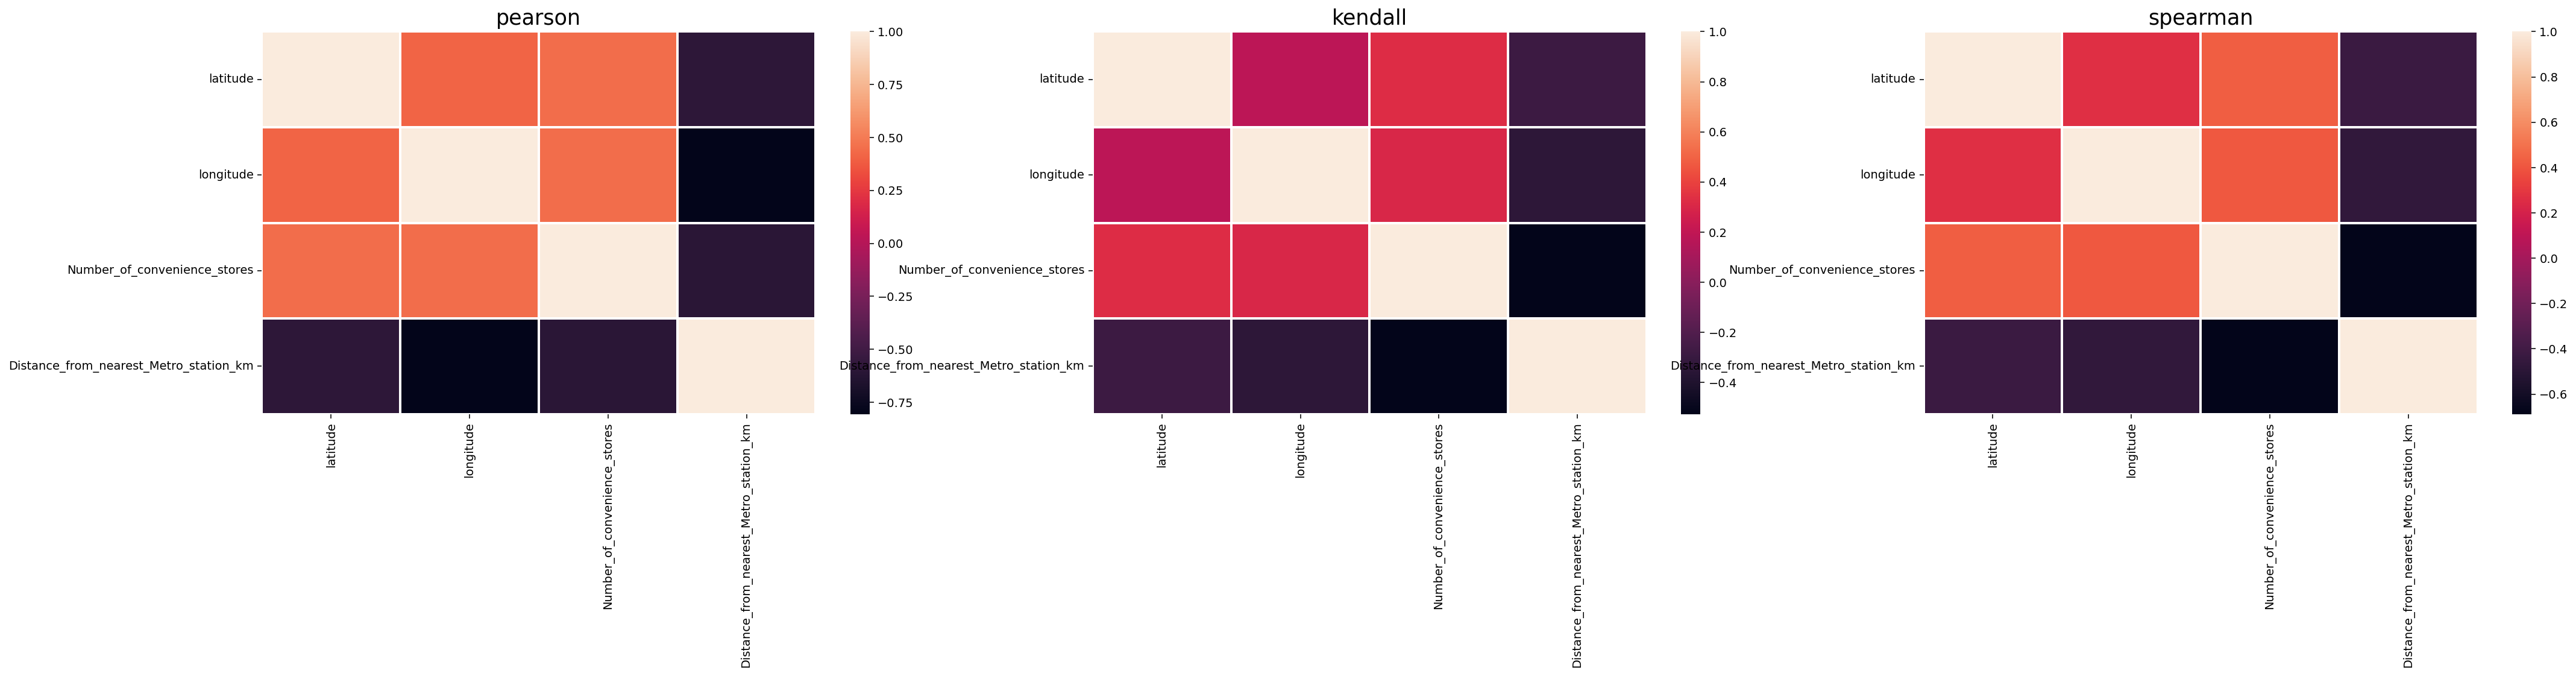

In [45]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = Data[Location_related_var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

* distance from metro doesnt seem to have much of a correlation
* But latitude, longitude and number of convenience stores have high correlation

#### Bivariate Relations with Target:

Now that we have gone through all the basic features one by one. Let us start looking at their relation with the target. This will help us in selecting and extracting features at the modelling stage

In [46]:
Data.columns

Index(['House_Age', 'Distance_from_nearest_Metro_station_km',
       'Number_of_convenience_stores', 'latitude', 'longitude',
       'Number_of_bedrooms', 'House_size_sqft', 'House_price_of_unit_area',
       'Property_age_cat', 'doy_ls_tran', 'Property_size_cat',
       'log_house_price'],
      dtype='object')

### House Price vs Transaction day

For different days, the House price can vary as different days might have different offers. 

Text(0.5, 1.0, 'House Price vs Transaction day')

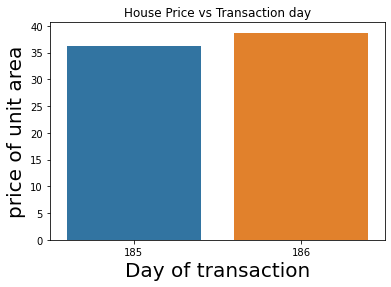

In [47]:
summary_day_avg_price = pd.DataFrame(Data.groupby(['doy_ls_tran'])['House_price_of_unit_area'].mean())
summary_day_avg_price.reset_index(inplace = True)
# summary_day_avg_price['unit']=1

summary_day_avg_price
summary_day_avg_price['doy_ls_tran']
summary_day_avg_price['House_price_of_unit_area']

sns.barplot(x=summary_day_avg_price['doy_ls_tran'], y= summary_day_avg_price['House_price_of_unit_area'])
plt.xlabel('Day of transaction', fontsize = 20)
plt.ylabel('price of unit area', fontsize = 20)
plt.title('House Price vs Transaction day')



* Looks like there is some difference in the price based on the day of purchase

Text(0.5, 1.0, 'House Price vs Age')

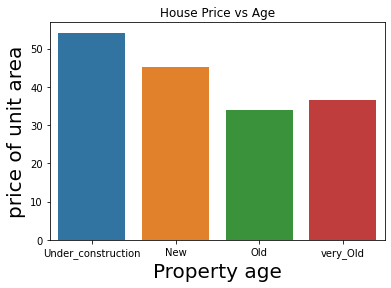

In [48]:
summary_day_avg_price = pd.DataFrame(Data.groupby(['Property_age_cat'])['House_price_of_unit_area'].mean())
summary_day_avg_price.reset_index(inplace = True)
# summary_day_avg_price['unit']=1

summary_day_avg_price
summary_day_avg_price['Property_age_cat']
summary_day_avg_price['House_price_of_unit_area']

sns.barplot(x=summary_day_avg_price['Property_age_cat'], y= summary_day_avg_price['House_price_of_unit_area'])
plt.xlabel('Property age', fontsize = 20)
plt.ylabel('price of unit area', fontsize = 20)
plt.title('House Price vs Age')

* Looks like the under construction properties have high price

Text(0.5, 1.0, 'House Price vs size')

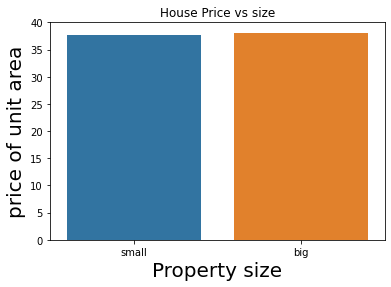

In [49]:
summary_day_avg_price = pd.DataFrame(Data.groupby(['Property_size_cat'])['House_price_of_unit_area'].mean())
summary_day_avg_price.reset_index(inplace = True)
# summary_day_avg_price['unit']=1

summary_day_avg_price
summary_day_avg_price['Property_size_cat']
summary_day_avg_price['House_price_of_unit_area']

sns.barplot(x=summary_day_avg_price['Property_size_cat'], y= summary_day_avg_price['House_price_of_unit_area'])
plt.xlabel('Property size', fontsize = 20)
plt.ylabel('price of unit area', fontsize = 20)
plt.title('House Price vs size')

* looks like size of the house doesnt effect the price of the property per unit area.

Text(0.5, 1.0, 'House Price vs No of Bedrooms')

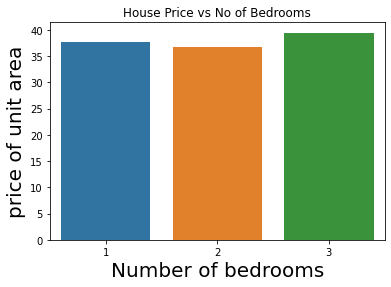

In [50]:
summary_day_avg_price = pd.DataFrame(Data.groupby(['Number_of_bedrooms'])['House_price_of_unit_area'].mean())
summary_day_avg_price.reset_index(inplace = True)
# summary_day_avg_price['unit']=1

summary_day_avg_price
summary_day_avg_price['Number_of_bedrooms']
summary_day_avg_price['House_price_of_unit_area']

sns.barplot(x=summary_day_avg_price['Number_of_bedrooms'], y= summary_day_avg_price['House_price_of_unit_area'])
plt.xlabel('Number of bedrooms', fontsize = 20)
plt.ylabel('price of unit area', fontsize = 20)
plt.title('House Price vs No of Bedrooms')


* there some price variance with 3 bedroom having highest avg price 

In [82]:
pip install folium


     -------------------------------------- 96.5/96.5 kB 791.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [275]:
import folium

Map = folium.Map(location = [24.97585,121.54516])

for i in range(0,len(Data)):
    folium.Marker([Data.iloc[i]['latitude'], Data.iloc[i]['latitude']]).add_to(Map)

Map
    


* Looks like location is some where in Africa

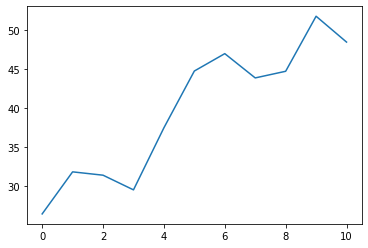

In [60]:

summary_avg_price = pd.DataFrame(Data.groupby(['Number_of_convenience_stores'])['House_price_of_unit_area'].mean())
summary_avg_price.reset_index(inplace = True)
# summary_avg_price['unit']=1

plt.plot(summary_avg_price["Number_of_convenience_stores"], summary_avg_price["House_price_of_unit_area"])

# sns.set(style="white", palette="muted", color_codes=True)
# sns.set_context("poster")
# sns.tsplot(data=summary_avg_price,unit = "unit", value="House_price_of_unit_area")
# sns.despine(bottom = False)



* It looks like the "No of convenient stores" variable plays a very crucial role in deciding the price of the house
* we can clearly see that the price is increasing with respect to number of convenient stores.

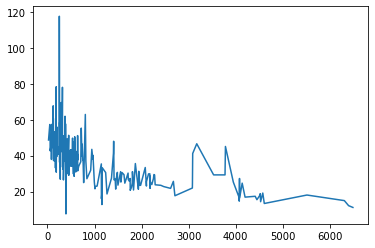

In [61]:

summary_avg_price = pd.DataFrame(Data.groupby(['Distance_from_nearest_Metro_station_km'])['House_price_of_unit_area'].mean())
summary_avg_price.reset_index(inplace = True)
# summary_avg_price['unit']=1

plt.plot(summary_avg_price["Distance_from_nearest_Metro_station_km"], summary_avg_price["House_price_of_unit_area"])

# sns.set(style="white", palette="muted", color_codes=True)
# sns.set_context("poster")
# sns.tsplot(data=summary_avg_price,unit = "unit", value="House_price_of_unit_area")
# sns.despine(bottom = False)



* we can clearly see that if the distance from the nearest metro is more the price is low. 
* There is one exception in the price value above 100 which we discussed earlier in the univariate analysis as an outlier 

### Multivariate analysis

**Pivot Table**

We are using Pivot table to comply with the objective of identifying the price Profile using multiple categorical features. First, Let's use Property age, No of bedrooms, convenience stores nearby and nearest metro and derive insights from the Pivot Table

In [63]:
Data.dtypes

House_Age                                  float64
Distance_from_nearest_Metro_station_km     float64
Number_of_convenience_stores                 int64
latitude                                   float64
longitude                                  float64
Number_of_bedrooms                        category
House_size_sqft                              int64
House_price_of_unit_area                   float64
Property_age_cat                          category
doy_ls_tran                                  int64
Property_size_cat                         category
log_house_price                            float64
dtype: object

In [66]:
Data.pivot_table('House_price_of_unit_area', ['doy_ls_tran', 'Property_size_cat', 'Property_age_cat','Number_of_bedrooms'], 'Number_of_convenience_stores', aggfunc='mean')

Number_of_convenience_stores                                                0   \
doy_ls_tran Property_size_cat Property_age_cat   Number_of_bedrooms              
185         small             Under_construction 1                   55.300000   
                              New                1                         NaN   
                              Old                1                   16.700000   
                              very_Old           1                   25.900000   
            big               Under_construction 2                   45.050000   
                                                 3                   55.200000   
                              New                2                   48.000000   
                                                 3                         NaN   
                              Old                2                   18.700000   
                                                 3                   19.200000   
                              very_Old           2                   14.650000   
                                                 3                   13.700000   
186         small             New                1                   34.666667   
                              Old                1                   22.472727   
                              very_Old           1                   17.900000   
            big               Under_construction 2                         NaN   
                                                 3                   45.500000   
                              New                2                   33.500000   
                                                 3                   32.750000   
                              Old                2                   23.450000   
                                                 3                   26.077778   
                              very_Old           2                   30.250000   
                                                 3                   30.440000   

Number_of_convenience_stores                                                1   \
doy_ls_tran Property_size_cat Property_age_cat   Number_of_bedrooms              
185         small             Under_construction 1                         NaN   
                              New                1                   27.000000   
                              Old                1                   33.250000   
                              very_Old           1                         NaN   
            big               Under_construction 2                   45.400000   
                                                 3                         NaN   
                              New                2                         NaN   
                                                 3                   25.600000   
                              Old                2                   20.750000   
                                                 3                   29.366667   
                              very_Old           2                   20.833333   
                                                 3                   34.200000   
186         small             New                1                         NaN   
                              Old                1                   32.625000   
                              very_Old           1                   24.275000   
            big               Under_construction 2                   52.200000   
                                                 3                   43.500000   
                              New                2                   23.500000   
                                                 3                   31.300000   
                              Old                2                   49.220000   
                                                 3                   30.885714   
                              very_Old           2             

* Highest average house price of 63 per unit area is seen for a Big under construction 2-bedroom property with 6 convenience stores makes sense.
* There is also an outlier of 60 per unit area - ( Qualities - small, very old, 1 bedroom ), it may be due to location but from the Map we can see that all the houses are in the same area.
    * This difference can be due to reasons like:
        * house with sunlight/east facing etc can have better price but that difference should be minimal. 
        * houses with historical importance this is bit of strech so lets consider it as an outlier for this scenario
          and deal with outliers while modelling.
* The big old 2-bedroom house with average cost just 7 is an outlier too.


In [70]:
Data.pivot_table('House_price_of_unit_area', ['doy_ls_tran', 'Property_size_cat', 'Property_age_cat','Number_of_bedrooms','latitude','longitude'], 'Number_of_convenience_stores', aggfunc='mean')

Number_of_convenience_stores                                                              0   \
doy_ls_tran Property_size_cat Property_age_cat   Number_of_bedrooms latitude longitude         
185         small             Under_construction 1                  24.95618 121.53844   NaN   
                                                                    24.97110 121.53170  55.3   
                                                                    24.97744 121.54458   NaN   
                              New                1                  24.95120 121.54900   NaN   
                                                                    24.95744 121.53711   NaN   
...                                                                                      ...   
186         big               very_Old           3                  24.98178 121.54059   NaN   
                                                                    24.98199 121.54464   NaN   
                                                                    24.98223 121.53597   NaN   
                                                                    24.98326 121.54460   NaN   
                                                                    24.99800 121.51550  41.2   

Number_of_convenience_stores                                                              1   \
doy_ls_tran Property_size_cat Property_age_cat   Number_of_bedrooms latitude longitude         
185         small             Under_construction 1                  24.95618 121.53844   NaN   
                                                                    24.97110 121.53170   NaN   
                                                                    24.97744 121.54458   NaN   
                              New                1                  24.95120 121.54900  27.0   
                                                                    24.95744 121.53711   NaN   
...                                                                                      ...   
186         big               very_Old           3                  24.98178 121.54059   NaN   
                                                                    24.98199 121.54464   NaN   
                                                                    24.98223 121.53597   NaN   
                                                                    24.98326 121.54460   NaN   
                                                                    24.99800 121.51550   NaN   

Number_of_convenience_stores                                                            2   \
doy_ls_tran Property_size_cat Property_age_cat   Number_of_bedrooms latitude longitude       
185         small             Under_construction 1                  24.95618 121.53844 NaN   
                                                                    24.97110 121.53170 NaN   
                                                                    24.97744 121.54458 NaN   
                              New                1                  24.95120 121.54900 NaN   
                                                                    24.95744 121.53711 NaN   
...                                                                                     ..   
186         big               very_Old           3                  24.98178 121.54059 NaN   
                                                                    24.98199 121.54464 NaN   
                                                                    24.98223 121.53597 NaN   
                                                                    24.98326 121.54460 NaN   
                                                                    24.99800 121.51550 NaN   

Number_of_convenience_stores                                                            3   \
doy_ls_tran Property_size_cat Property_age_cat   Number_of_bedrooms latitude longitude       
185         small             Under_construction 1                  24.95618 121.53844 NaN 

* Even though the houses are located in the same area there are differences in house price

## Lets Model:

It is a iterative process and we have to check a few models and find the best one. 

I will create a base model then use models like KNN,Linear regression,Decision Tree, Random forest etc

In [91]:
Data = pd.read_excel("DS_Assignment_Part1_data_set.xlsx")

In [92]:
#first 5 instances using "head()" function
Data.head()

,Transaction_date,House_Age,Distance_from_nearest_Metro_station_km,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size_sqft,House_price_of_unit_area
0,1905-07-04 22:00:00.003,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,1905-07-04 22:00:00.003,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,1905-07-05 13:59:59.997,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,1905-07-05 12:00:00.000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,1905-07-04 19:59:59.997,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [93]:
#last 5 instances using "tail()" function
Data.tail()

,Transaction_date,House_Age,Distance_from_nearest_Metro_station_km,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size_sqft,House_price_of_unit_area
409,1905-07-05 00:00:00.000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,1905-07-04 16:00:00.003,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,1905-07-05 06:00:00.000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,1905-07-05 00:00:00.000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5
413,1905-07-05 12:00:00.000,6.5,90.45606,9,24.97433,121.54310,2,1097,63.9


In [94]:
Data.shape

(414, 9)

In [95]:
#Printing all the columns present in data
Data.columns

Index(['Transaction_date', 'House_Age',
       'Distance_from_nearest_Metro_station_km',
       'Number_of_convenience_stores', 'latitude', 'longitude',
       'Number_of_bedrooms', 'House_size_sqft', 'House_price_of_unit_area'],
      dtype='object')

In [96]:
# A closer look at the data types present in the data
Data.dtypes

Transaction_date                          datetime64[ns]
House_Age                                        float64
Distance_from_nearest_Metro_station_km           float64
Number_of_convenience_stores                       int64
latitude                                         float64
longitude                                        float64
Number_of_bedrooms                                 int64
House_size_sqft                                    int64
House_price_of_unit_area                         float64
dtype: object

#### Datetime Data Type

**Breaking down the date variable** into granular information will **help us in understand when the last transaction was done from different perspectives**. But since the data has only two dates 04-07-1905 and 05-07-1905 just day of the year will suffice

In [97]:
# creating an instance(date) of DatetimeIndex class using "last_transaction"
date = pd.DatetimeIndex(Data['Transaction_date'])

In [98]:
# extracting new columns from "Transaction_date"

# last day of year when transaction was done
Data['doy_ls_tran'] = date.dayofyear


In [99]:
# checking new extracted columns using datetime
Data[['Transaction_date','doy_ls_tran']].head()

,Transaction_date,doy_ls_tran
0,1905-07-04 22:00:00.003,185
1,1905-07-04 22:00:00.003,185
2,1905-07-05 13:59:59.997,186
3,1905-07-05 12:00:00.000,186
4,1905-07-04 19:59:59.997,185


Now that we have extracted the essentials from the last_transaction variables, we will drop it from the dataset.

In [100]:
Data = Data.drop(columns = ['Transaction_date'])
Data.dtypes

House_Age                                 float64
Distance_from_nearest_Metro_station_km    float64
Number_of_convenience_stores                int64
latitude                                  float64
longitude                                 float64
Number_of_bedrooms                          int64
House_size_sqft                             int64
House_price_of_unit_area                  float64
doy_ls_tran                                 int64
dtype: object

### Missing Values

In [101]:
# finding number of missing values in every variable
Data.isnull().sum()

House_Age                                 0
Distance_from_nearest_Metro_station_km    0
Number_of_convenience_stores              0
latitude                                  0
longitude                                 0
Number_of_bedrooms                        0
House_size_sqft                           0
House_price_of_unit_area                  0
doy_ls_tran                               0
dtype: int64

In [102]:
Data

,House_Age,Distance_from_nearest_Metro_station_km,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size_sqft,House_price_of_unit_area,doy_ls_tran
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,185
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,185
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,186
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,186
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,185
...,...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4,186
410,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0,185
411,18.8,390.96960,7,24.97923,121.53986,1,503,40.6,186
412,8.1,104.81010,5,24.96674,121.54067,1,597,52.5,186


## Base Model - Lets just take simple mean for our base model before going into real models

**Outlier handling**

From our previous analysis we found that there are outliers in variables:
    Distance_from_nearest_Metro_station_km,
    latitude,
    longitude,
    House_price_of_unit_area. 
so lets handle them using IQR method

In [103]:
def UVA_outlier(data, var):
    
    # calculating descriptives of variable
    quant25 = data[var].quantile(0.25)
    quant75 = data[var].quantile(0.75)
    IQR = quant75 - quant25
    med = data[var].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    
    ls = data.index[(data[var] < whis_low) | (data[var] > whis_high)]
    return ls

In [105]:
def remove(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [129]:
import pdb
index_list1 = []

# for j in data.drop(['id','vendor_id','pickup_datetime','dropoff_datetime','store_and_fwd_flag'], axis=1).columns:
for j in ['Distance_from_nearest_Metro_station_km','latitude','longitude','House_price_of_unit_area']:
# for j in Data.columns:
    
    for i in [j]:
        index_list1.extend(UVA_outlier(Data,i))
#         pdb.set_trace()
        data_cleaned = remove(Data,index_list1)
index_list1.clear()

In [133]:
data_cleaned

,House_Age,Distance_from_nearest_Metro_station_km,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size_sqft,House_price_of_unit_area,doy_ls_tran
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,185
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,185
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,186
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,186
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,185
...,...,...,...,...,...,...,...,...,...
408,18.5,2175.74400,3,24.96330,121.51243,1,477,28.1,186
410,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0,185
411,18.8,390.96960,7,24.97923,121.53986,1,503,40.6,186
412,8.1,104.81010,5,24.96674,121.54067,1,597,52.5,186


In [135]:
data = data_cleaned

**Shuffling and Creating Train and Test Set**

In [136]:
from sklearn.utils import shuffle
# Shuffling the Dataset
data = shuffle(data, random_state = 42)
#creating 4 divisions
div = int(data.shape[0]/4)
# 3 parts to train set and 1 part to test set
train = data.loc[:3*div+1,:]
test = data.loc[3*div+1:]

**Simple Mean ( mean of House price per unit area)**

In [137]:
# storing simple mean in a new column in the test set as "simple_mean"
train['simple_mean'] = train['House_price_of_unit_area'].mean()
test['simple_mean'] = test['House_price_of_unit_area'].mean()

C:\Users\vempa\AppData\Local\Temp/ipykernel_20036/1292088813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['simple_mean'] = train['House_price_of_unit_area'].mean()
C:\Users\vempa\AppData\Local\Temp/ipykernel_20036/1292088813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['simple_mean'] = test['House_price_of_unit_area'].mean()


In [138]:
#calculating mean absolute error
from sklearn.metrics import mean_absolute_error as MAE
simple_train_mean_error = MAE(train['House_price_of_unit_area'] , train['simple_mean'])
simple_train_mean_error

9.035126369612856

In [139]:
simple_test_mean_error = MAE(test['House_price_of_unit_area'] , test['simple_mean'])
simple_test_mean_error

9.624158540421517

so lets keep this as a base error and we will try to reduce this error by using various models

## KNN Model

### Segregating variables: Independent and Dependent Variables

In [140]:
#seperating independent and dependent variables
# we have already taken required information from pickup_datetime column and placed in separate columns - so we dont need them
# we dont need dropoff_datetime since we have pickup and duration- removed to improve code processing speed
x = data.drop(['House_price_of_unit_area'], axis=1)
y = data['House_price_of_unit_area']
x.shape, y.shape

((371, 8), (371,))

In [141]:
x.head()

,House_Age,Distance_from_nearest_Metro_station_km,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,House_size_sqft,doy_ls_tran
366,14.2,1801.5440,1,24.95153,121.55254,1,589,185
36,14.7,1935.0090,2,24.96386,121.51458,2,1131,185
16,0.0,292.9978,6,24.97744,121.54458,3,1441,186
353,4.1,2147.3760,3,24.96299,121.51284,2,901,186
65,40.1,123.7429,8,24.97635,121.54329,3,1351,186


In [142]:
y.head()

366    24.8
36     22.9
16     70.1
353    31.3
65     44.3
Name: House_price_of_unit_area, dtype: float64

### Scaling the data (Using MinMax Scaler)

In [143]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [144]:
x = pd.DataFrame(x_scaled)

In [145]:
x.head()

,0,1,2,3,4,5,6,7
0,0.324201,0.580759,0.1,0.054912,0.827941,0.0,0.170620,0.0
1,0.335616,0.624350,0.2,0.305674,0.118010,0.5,0.665146,0.0
2,0.000000,0.088058,0.6,0.581859,0.679072,1.0,0.947993,1.0
3,0.093607,0.693710,0.3,0.287980,0.085468,0.5,0.455292,1.0
4,0.915525,0.032778,0.8,0.559691,0.654947,1.0,0.865876,1.0


In [146]:
# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Implementing KNN Regressor

In [147]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_absolute_error as MAE


In [148]:
# Creating instance of KNN
reg = KNN(n_neighbors = 5)

# Fitting the model
reg.fit(train_x, train_y)



KNeighborsRegressor()

In [149]:
# Predicting over the Train Set and calculating MSE
test_predict = reg.predict(test_x)
k = MAE(test_predict, test_y)
print('Test MAE    ', k )

Test MAE     5.695698924731183


### Elbow for Classifier

In [150]:
def Elbow(K):
  #initiating empty list
    test_mae = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = MAE(tmp,test_y)
        test_mae.append(tmp)
    
    return test_mae

In [157]:
#Defining K range
k = range(1,30)

In [158]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

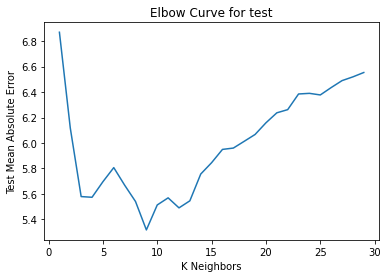

In [159]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Absolute Error')
plt.title('Elbow Curve for test')

In [160]:
# Creating instance of KNN
reg = KNN(n_neighbors = 9)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MAE
test_predict = reg.predict(test_x)
k = MAE(test_predict, test_y)
print('Test MAE    ', k )

Test MAE     5.317323775388291


# so the best value for K could be 9

In [29]:
# Over fitting and Under fitting

In [161]:
# Creating instance of KNN
reg = KNN(n_neighbors = 9)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MAE
train_predict = reg.predict(train_x)
k = MAE(train_predict, train_y)
print('Train MAE    ', k )

# Predicting over the Train Set and calculating MAE
test_predict = reg.predict(test_x)
k = MAE(test_predict, test_y)
print('Test MAE    ', k )

Train MAE     5.4802957633892895
Test MAE     5.317323775388291


### Checking Consistency , using Cross Validation

In [162]:
from sklearn.model_selection import cross_val_score
score = cross_val_score( KNN(n_neighbors = 9), X = train_x, y = train_y, cv = 10)
score

array([0.4292307 , 0.4685903 , 0.57017149, 0.39017455, 0.09811714,
       0.59118825, 0.5776977 , 0.49464561, 0.50711768, 0.6046579 ])

In [163]:
# Consistency using Mean and standard deviation in percentage
score.mean()*100, score.std()*100

(47.31591323980336, 14.236252177076688)

### Automating the process of cross validation for different K-Neighbors

In [164]:
def Val_score(n_neighbors):
    '''
  takes range of n_neighbors as input
  returns Mean and Standard Deviation for each value of n_neighbors
  '''
    avg = []
    std = []
  
    for i in n_neighbors:
    
    # 10 fold cross validation for every value of n_neighbor
      score = cross_val_score( KNN(n_neighbors = i) , X = train_x, y = train_y, cv = 10)
    
    # adding mean to avg list
      avg.append(score.mean())
    
    # adding standard deviation to std list
      std.append(score.std())
    
    return avg, std

In [177]:
n_neighbors = range(1,10)
mean, std = Val_score(n_neighbors)

### Ploting Mean Validation Score for each K value

Text(0.5, 1.0, 'Mean Validation score')

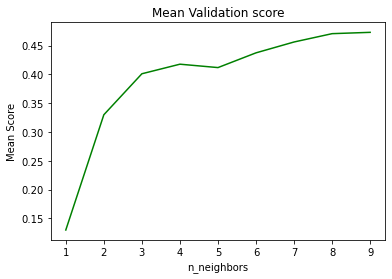

In [178]:
plt.plot(n_neighbors, mean, color = 'green', label = 'mean' )
plt.xlabel('n_neighbors')
plt.ylabel('Mean Score')
plt.title('Mean Validation score')

### Ploting Standard Deaviation Validation Score for each K value

Text(0.5, 1.0, 'Standard Deviation of Validation score')

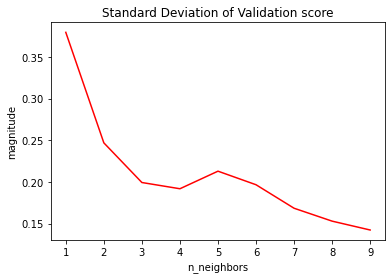

In [179]:
plt.plot(n_neighbors, std, color = 'red', label = 'Standard deviation' )
plt.xlabel('n_neighbors')
plt.ylabel('magnitude')
plt.title('Standard Deviation of Validation score')

### Trying the optimal model over test set

In [180]:
clf = KNN(n_neighbors = 9 )
clf.fit(train_x, train_y)

score1 = clf.score(train_x, train_y)

score = clf.score(test_x, test_y)
score, score1

(0.6398336950529382, 0.6071414724088418)

In [175]:
# Creating instance of KNN
reg = KNN(n_neighbors = 9)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating MAE
train_predict = reg.predict(train_x)
k = MAE(train_predict, train_y)
print('Train MAE    ', k )

# Predicting over the Train Set and calculating MAE
test_predict = reg.predict(test_x)
k = MAE(test_predict, test_y)
print('Test MAE    ', k )

Train MAE     5.4802957633892895
Test MAE     5.317323775388291


#### so our MAE has reduced for KNN model when we compare it with Base model

# Linear Regression

### Segregating variables: Independent and Dependent Variables

In [181]:
#seperating independent and dependent variables
x = data.drop(['House_price_of_unit_area'], axis=1)
y = data['House_price_of_unit_area']
x.shape, y.shape

((371, 8), (371,))

### Splitting the data into train set and the test set

In [182]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 42)

### Implementing Linear Regression

In [183]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

In [184]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

In [185]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )
R_squared = r2_score(train_predict,train_y)
print('R2 score on train set', R_squared )

Training Mean Absolute Error 5.126295175098277
R2 score on train set 0.4711734076582136


In [186]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )
R_squared = r2_score(test_predict,test_y)
print('R2 score on test set', R_squared )

Test Mean Absolute Error     5.182230803199022
R2 score on test set 0.42156714424886055


### Parameters of Linear Regression

In [187]:
lr.coef_

array([-3.23902972e-01, -8.05513227e-03,  9.42793922e-01,  3.33764462e+02,
        2.83035733e+01,  1.43824663e+00, -3.66777519e-03,  2.26425763e+00])

### Plotting the coefficients

Text(0.5, 1.0, 'Coefficient plot')

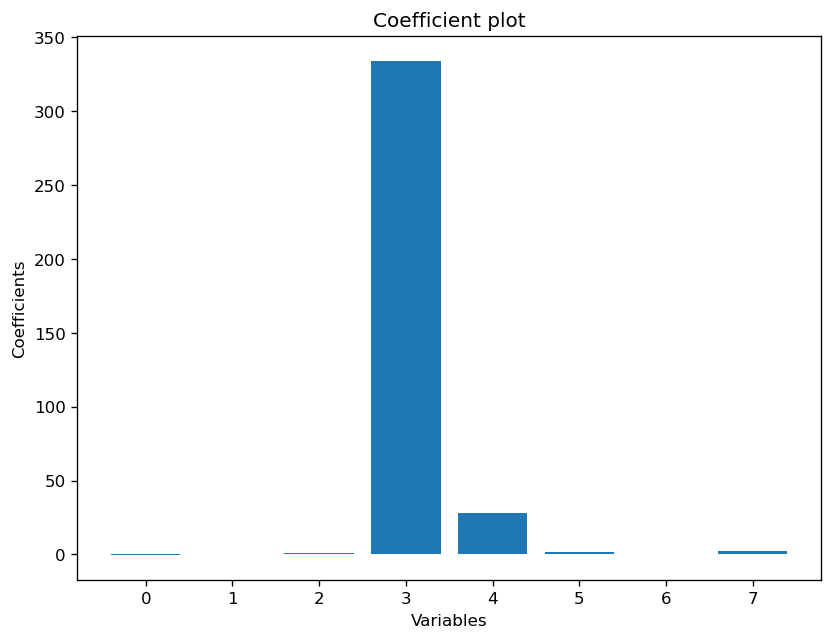

In [188]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

Here we can see that the model depends upon some Independent variables too much, But these coefficients are not suitable for interpretation because these are not scaled, therefore we will normalize and interpret later.

## Checking assumptions of Linear Model

In [189]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
188,44.3,42.842930,1.457070
400,35.5,42.615846,-7.115846
313,42.8,49.220952,-6.420952
56,41.9,43.895030,-1.995030
3,54.8,49.770312,5.029688


### Plotting residual curve (Is there constant Variance OR Homoscedastic?)

In [190]:
residuals.residuals[:]

188    1.457070
400   -7.115846
313   -6.420952
56    -1.995030
3      5.029688
         ...   
76     1.684264
304   -0.973065
310   -2.957822
145   -2.886381
355    8.661152
Name: residuals, Length: 93, dtype: float64

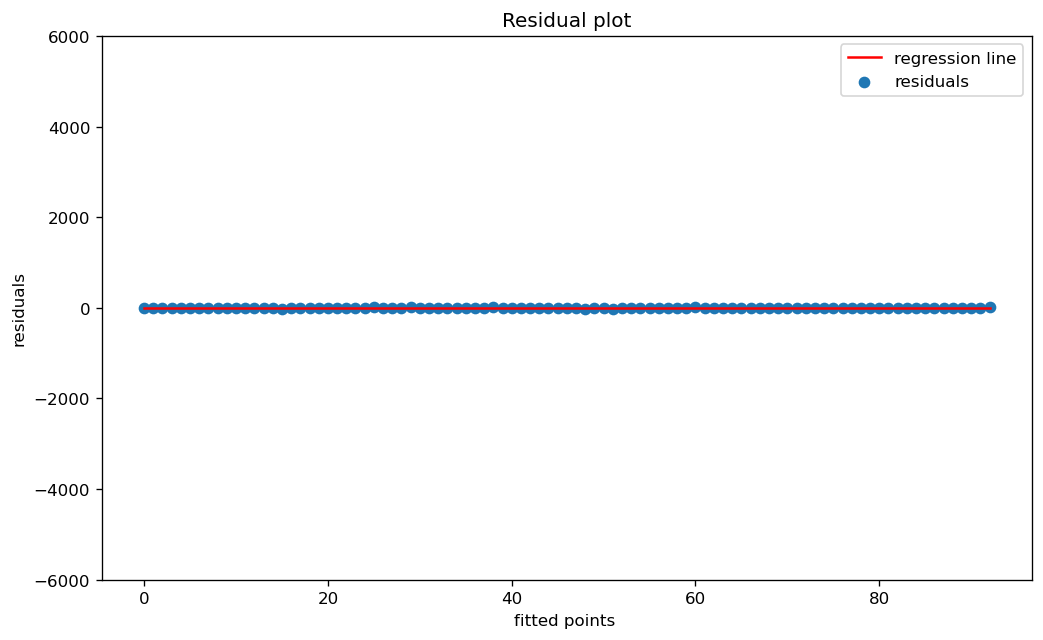

In [192]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,93)
k = [0 for i in range(0,93)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-6000, 6000)
plt.legend()

The Residual plot clearly Looks Homoscedastic, i.e. the the variance of the error across the dataset is nearly constant.

### Checking Distribution of Residuals

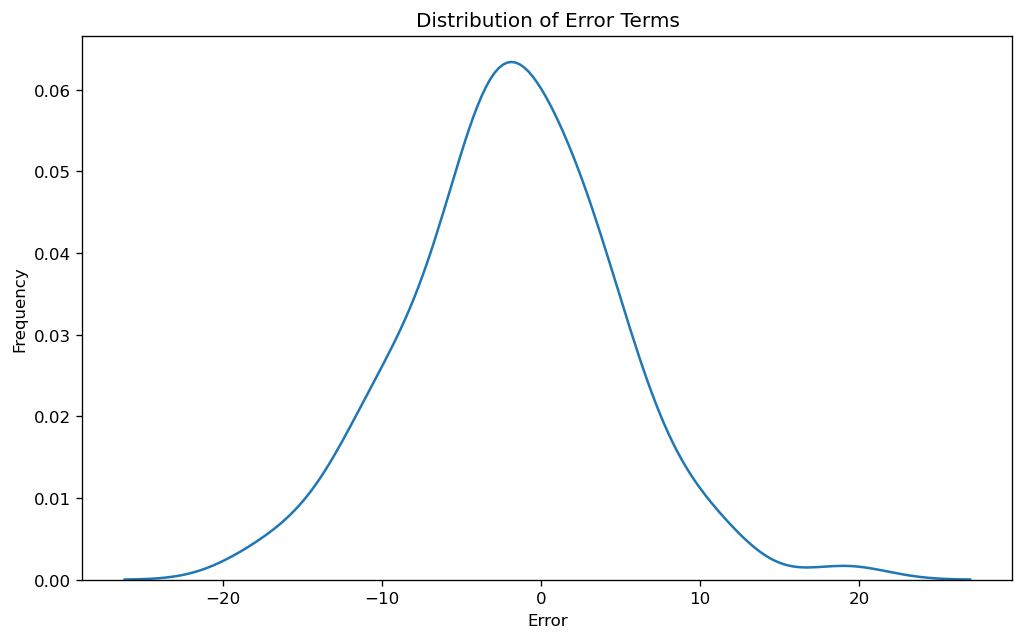

In [194]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
# plt.hist(residuals.residuals, bins = 150)
sns.kdeplot(residuals.residuals)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
# plt.xlim(-10000, 20000)
plt.show()

According to the Kdeplot, the distribution of error is normal

### QQ-Plot (Is the data Normally Distributed?)

C:\Users\vempa\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


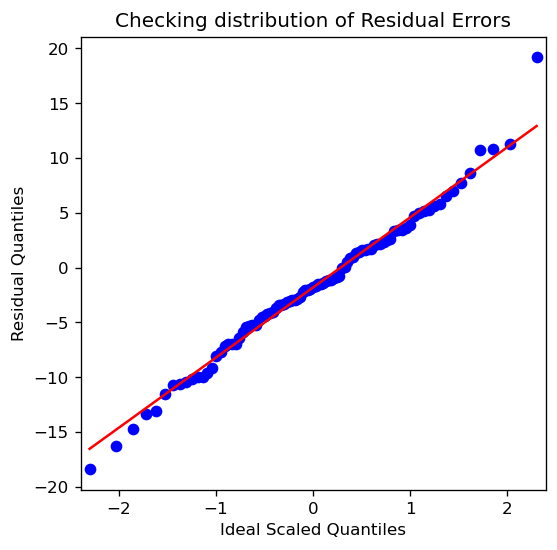

In [195]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

The QQ-plot clearly verifies our findings from the the histogram of the residuals, the data is normal, Even after removing outliers with interquartile range method, there is still 1 outliers.

### Variance Inflation Factor (VIF) (Checking for multi collinearity)

In [196]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index =data.columns)
VIF


House_Age                                 4.234704e+00
Distance_from_nearest_Metro_station_km    4.925298e+00
Number_of_convenience_stores              5.628087e+00
latitude                                  7.946496e+06
longitude                                 8.188105e+06
Number_of_bedrooms                        1.674157e+01
House_size_sqft                           2.016374e+01
House_price_of_unit_area                  3.458381e+01
doy_ls_tran                               1.661943e+05
dtype: float64

In [197]:
round(VIF[0:14],2)

House_Age                                       4.23
Distance_from_nearest_Metro_station_km          4.93
Number_of_convenience_stores                    5.63
latitude                                  7946496.41
longitude                                 8188104.64
Number_of_bedrooms                             16.74
House_size_sqft                                20.16
House_price_of_unit_area                       34.58
doy_ls_tran                                166194.25
dtype: float64

From this list, we clearly see that there happens to be many Independent Variable over the value of 5, which means that there are Many features that exhibit the Multicollinearity in the dataset. Note that VIF only works for the Continuous Variables. 

In [198]:
data_cleaned.dtypes

House_Age                                 float64
Distance_from_nearest_Metro_station_km    float64
Number_of_convenience_stores                int64
latitude                                  float64
longitude                                 float64
Number_of_bedrooms                          int64
House_size_sqft                             int64
House_price_of_unit_area                  float64
doy_ls_tran                                 int64
dtype: object

#### so remove the variables with VIF more than 5 

In [207]:
data_multicol = data.drop(['latitude', 'longitude','Number_of_bedrooms','doy_ls_tran','House_price_of_unit_area'], axis=1)

In [208]:
VIF = pd.Series([variance_inflation_factor(data_multicol.values, i) for i in range(data_multicol.shape[1])], index =data_multicol.columns)
VIF

House_Age                                 2.790411
Distance_from_nearest_Metro_station_km    2.112229
Number_of_convenience_stores              3.461598
House_size_sqft                           4.936098
dtype: float64

## Model Interpretability

So far we have simply been predicting the values using the linear regression, But in order to Interpret the model, the normalising of the data is essential.

In [210]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

C:\Users\vempa\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [211]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )
R_squared = r2_score(train_predict,train_y)
print('R2 score on test set', R_squared )

Training Mean Absolute Error 5.126295175098355
R2 score on test set 0.4711734076581894


In [212]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )
R_squared = r2_score(test_predict,test_y)
print('R2 score on test set', R_squared )

Test Mean Absolute Error     5.182230803199295
R2 score on test set 0.42156714424875275


Text(0.5, 1.0, 'Normalized Coefficient plot')

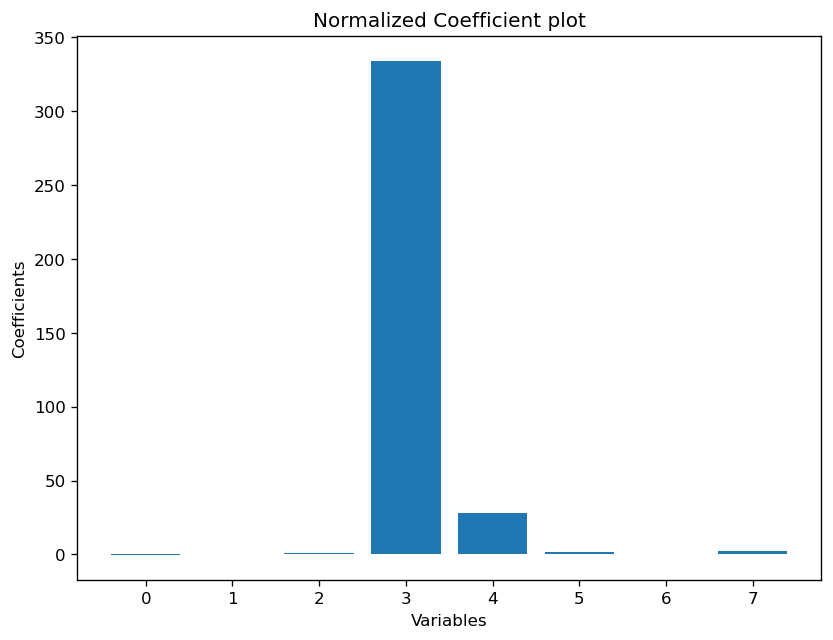

In [213]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

Now the coefficients we see are normalised and we can easily make final inferences out of it.

Here we can see that there are a lot of Coefficients which are near to zero and not Significant.
So let us try removing them and build the model again.

#### Creating new subsets of data

In [215]:
#seperating independent and dependent variables
x = data.drop(['House_price_of_unit_area'], axis=1)
y = data['House_price_of_unit_area']
x.shape, y.shape

((371, 8), (371,))

#### Arranging coefficients with features

In [216]:
Coefficients = pd.DataFrame({
    'Variable'    : x.columns,
    'coefficient' : lr.coef_
})
Coefficients.head()

,Variable,coefficient
0,House_Age,-0.323903
1,Distance_from_nearest_Metro_station_km,-0.008055
2,Number_of_convenience_stores,0.942794
3,latitude,333.764462
4,longitude,28.303573


#### Choosing variables with sigificance greater than 0.5 ( Filtering Significant Features)

In [217]:
sig_var = Coefficients[Coefficients.coefficient > 0.5]

#### Extracting the significant subset of independent Variables

In [218]:
subset = data[sig_var['Variable'].values]
subset.head()

,Number_of_convenience_stores,latitude,longitude,Number_of_bedrooms,doy_ls_tran
366,1,24.95153,121.55254,1,185
36,2,24.96386,121.51458,2,185
16,6,24.97744,121.54458,3,186
353,3,24.96299,121.51284,2,186
65,8,24.97635,121.54329,3,186


#### Splitting the data into train set and the test set

In [219]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 42)

#### Implementing Linear Regression

In [220]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

#### Training Model

In [221]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

C:\Users\vempa\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

#### Predicting over the train set

In [222]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 6.996833842753419


#### Predicting over the test set

In [223]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     6.699318319834363


So the error increased after removing the co-efficients. so with co-efficients is the better way and no need for rigde or lasso regression.

#### Plotting the coefficients

Text(0.5, 1.0, 'Normalized Coefficient plot')

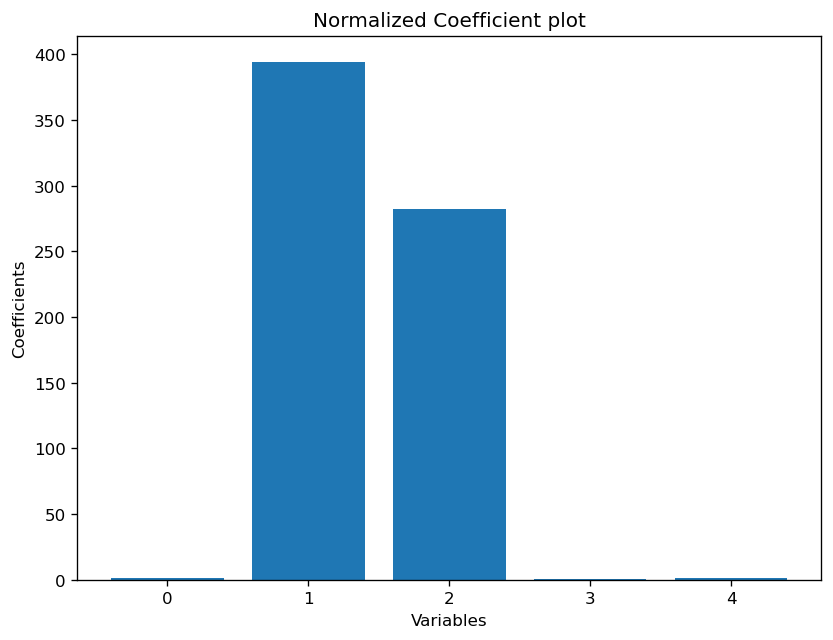

In [224]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

**We can see that the error has reduced from 5.317323775388291 in KNN model to 5.182230803199022 in Linear regression model**

# Decision Tree 

In [229]:
#seperating independent and dependent variables
x = data.drop(['House_price_of_unit_area'], axis=1)
y = data['House_price_of_unit_area']
x.shape, y.shape

((371, 8), (371,))

In [230]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [231]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [264]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating error
train_predict = reg.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )


Training Mean Absolute Error 0.0


In [265]:
# Predicting over the Test Set and calculating error
test_predict = reg.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )


Test Mean Absolute Error     5.818279569892473


**We can see that the error has increased from 5.182230803199022 in Linear regression model to 5.58817 in decision tree model**

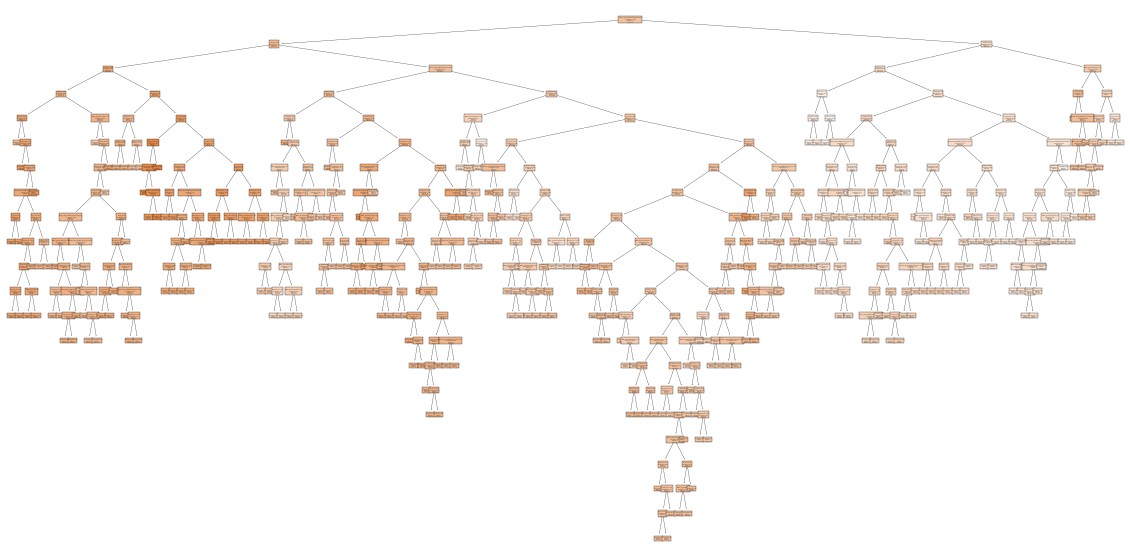

In [263]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(20,10))

plot_tree(reg, feature_names=train_x.columns, filled=True);

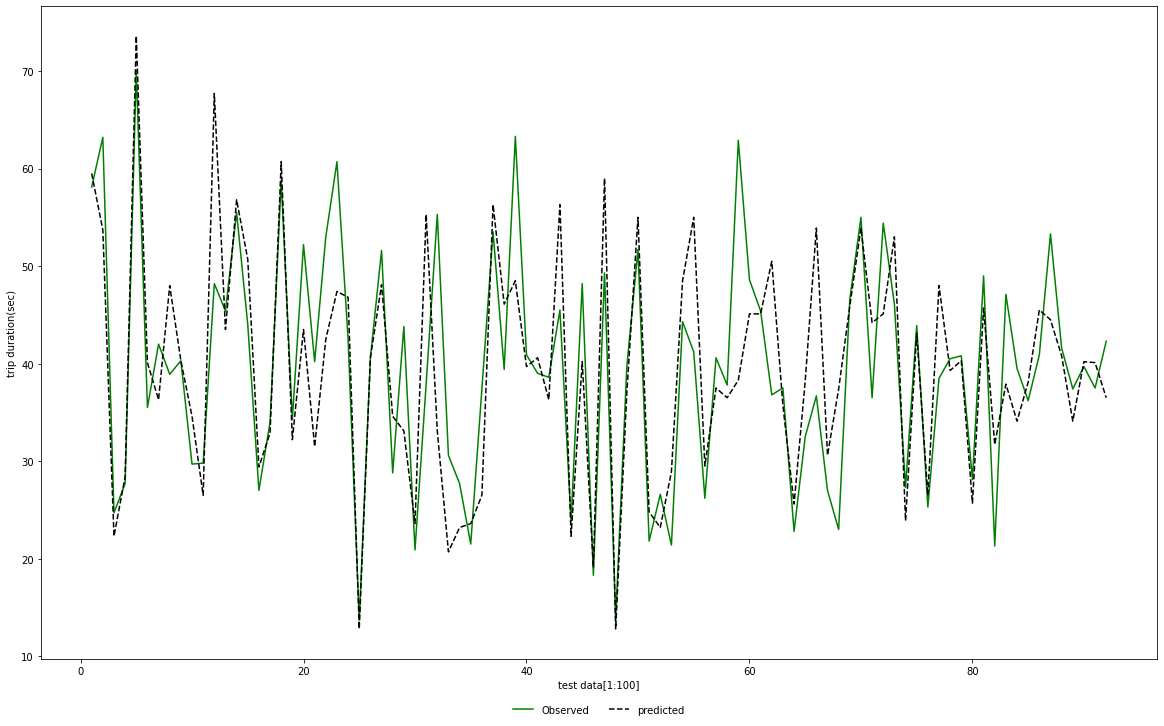

In [234]:
plt.rcParams['figure.figsize'] = (20,12)
x_ax = range(len(test_x))
plt.plot(x_ax[1:100],test_y[1:100],label= 'Observed',color = 'g', linestyle = '-')
plt.plot(x_ax[1:100],test_predict[1:100],label= 'predicted',color = 'k', linestyle = '--')
plt.xlabel('test data[1:100]')
plt.ylabel('trip duration(sec)')
plt.legend(bbox_to_anchor = (0.5,-0.1), loc = 'lower center', ncol = 2, frameon = False)
plt.show()

**It looks like the data is overfitting**

C:\Users\vempa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


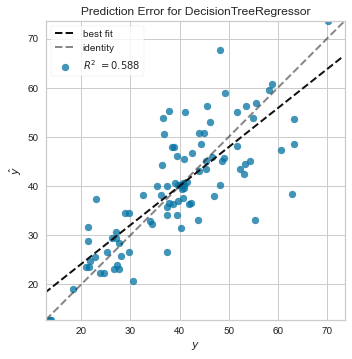

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [235]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(reg)
visualizer.fit(train_x,train_y)
visualizer.score(test_x,test_y)
visualizer.poof()

**Lets tune the model**

Now that we’ve trained our model, our goal is to tune the max_depth and find the less error value.

In [274]:
for i in range(7,10,1):

    reg = DecisionTreeRegressor(max_depth = i , random_state = 42)
    reg.fit(train_x, train_y)

    # Predicting over the Train Set and calculating error
    train_predict = reg.predict(train_x)
    k = mae(train_predict, train_y)
#     print('Training Mean Absolute Error for max_depth =',i,'is', k )

    # Predicting over the Test Set and calculating error
    test_predict = reg.predict(test_x)
    k = mae(test_predict, test_y)
    print('Test Mean Absolute Error for max_depth =',i,'is', k)



Test Mean Absolute Error for max_depth = 7 is 5.38564489384099
Test Mean Absolute Error for max_depth = 8 is 5.057513854283804
Test Mean Absolute Error for max_depth = 9 is 5.478822324628777


Error is low at max_depth 8 which is 5.05

## Importance of Variables

In [242]:
df = pd.DataFrame({'Feature Names': x.columns, 'Importances': reg.feature_importances_})
df_sort = df.sort_values(by='Importances',ascending = False)
df_sort

,Feature Names,Importances
1,Distance_from_nearest_Metro_station_km,0.481733
0,House_Age,0.239116
3,latitude,0.091159
4,longitude,0.089650
2,Number_of_convenience_stores,0.043117
6,House_size_sqft,0.031244
7,doy_ls_tran,0.020319
5,Number_of_bedrooms,0.003662


#### Distance_from_nearest_Metro_station_km has high importance 
#### Number_of_bedrooms has low importance

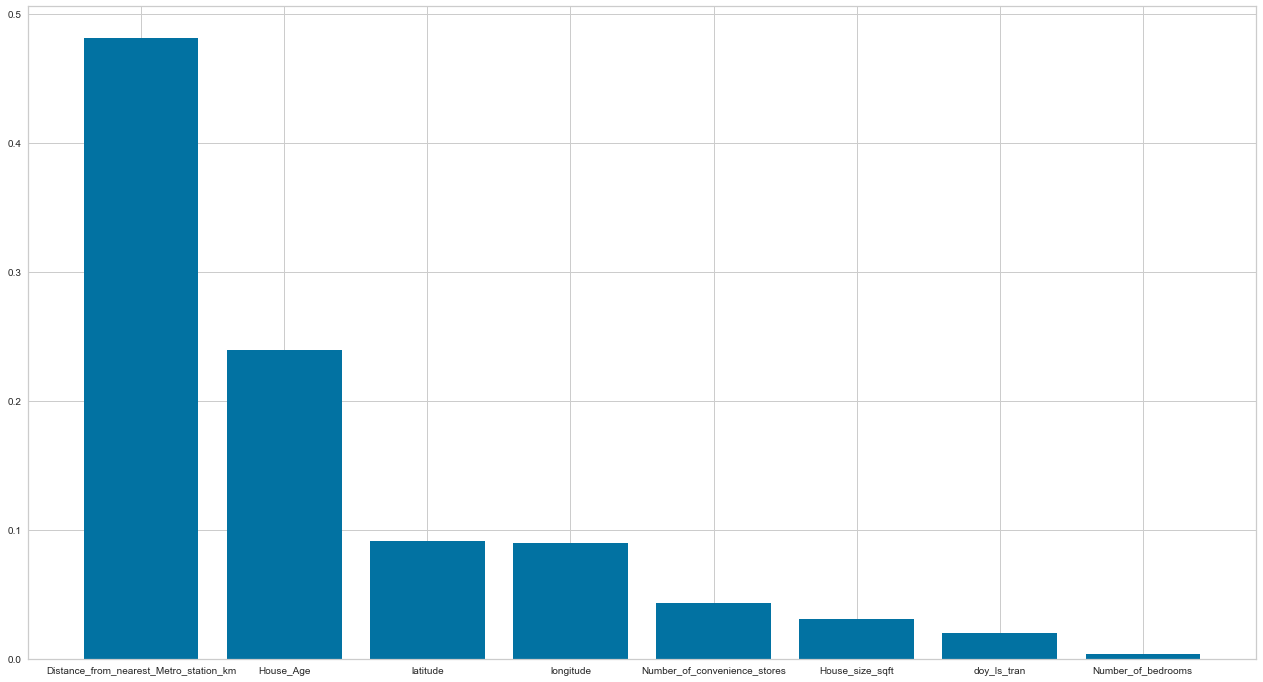

In [245]:
plt.rcParams['figure.figsize'] = (22,12)
plt.bar(df_sort['Feature Names'],df_sort['Importances'])
plt.show()

###### Distance from nearest metro has high importance and the house age is the second in the line.
###### number of bed rooms has low importance comparitively. 

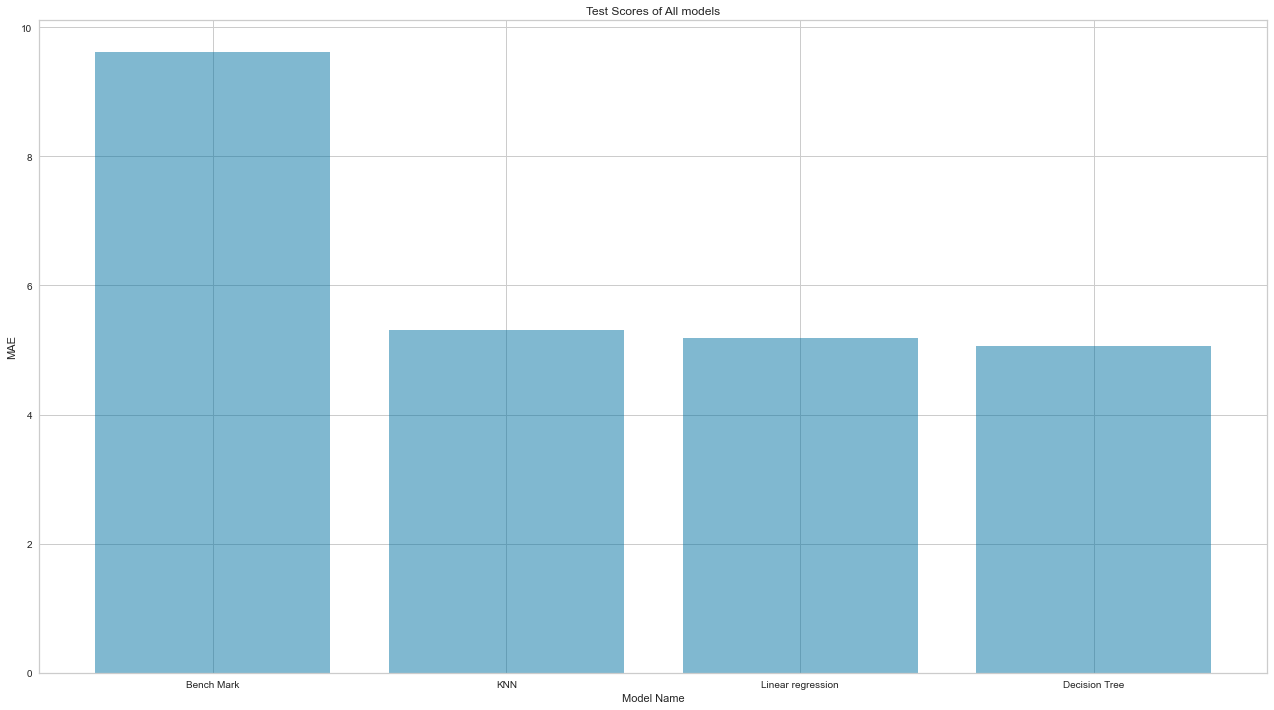

In [277]:
#data
x = ['Bench Mark', 'KNN', 'Linear regression', 'Decision Tree' ]
train_score = [9.624158540421517, 5.317323775388291, 5.182230803199022, 5.057513854283804]
 
#bar plot
plt.bar(x, height=train_score, alpha=0.5)
plt.title('Test Scores of All models')
plt.xlabel('Model Name')
plt.ylabel('MAE')
plt.show()

# Decision Tree model has least Mean absolute error, So that should be our preferred choice among the models used.